# Fundamentals

In fire safety engineering compartment fires are an important topic. The development of a fire in a compartment determines the energy release and the spread of smoke through a building.   This has direct on the safety of the occupants and how effective the fire brigade can deal with the fire. A good overview on modelling principles of compartment fires is given in the book "Enclosure Fire Dynamics" by Karlsson and Quinitere {cite}`Karlsson.1999`. We take some of the aspect described in this book and discuss them here in context of the lecture. The simulations themselves are built around some experiments that are fundamental to the field of fire safety engineering. 

At first, we look into plume models and experiment data from McCaffrey {cite}`McCaffrey.1979`, which are described in the report about ["Purely Buoyant Diffusion Flames"](https://nvlpubs.nist.gov/nistpubs/Legacy/IR/nbsir79-1910.pdf). These plume experiments and respective models are a good starting point to modelling compartment fires. Using gas burners at different locations, Steckler et al. performed a number of experiments in a regular-sized compartment  {cite}`Steckler.1982` ($\mf 2.8~m \times 2.8~m \times 2.18~m$). The results are provided in the report ["Flow Induced by Fire in a Compartment"](https://nvlpubs.nist.gov/nistpubs/Legacy/IR/nbsir82-2520.pdf).




This brief introduction into the fluid dynamics in a compartment fire is based on a characteristic setup and simulations carried out. 


:::{figure-md} fig-Steckler02

<img src="figs/Steckler02.png" width="60%">

Overview over the experimental setup used by Steckler et al. {cite}`Steckler.1982`.
:::



:::{figure-md} fig-Steckler01

<img src="figs/Steckler01.png" width="60%">

Overview over the experimental setup used by Steckler et al. {cite}`Steckler.1982`.
:::





## Setup

The compartment has an extension of 

$$
\mf I_{compartment} = [0.20~m, 2.70~m] \times [-1.40~m, 1.40~m] \times [0.05~m, 2.00~m]
$$

and is embeded in a computational domain of 

$$
\mf I_{domain} = [0.00~m, 4.80~m] \times [-1.80~m, 1.80~m] \times [0.00~m, 3.00~m] \quad .
$$

```{margin}
See the [FDS introduction section](../../tools/01_fds_smv/02_fds_tutorial) for a quick introduction on how to define a computational domain and obstacles.
```

The compartment is build out of individual obstacles, creating the walls, the floor and the ceiling. One of the walls contains an opening, see {numref}`fig-compartment-setup`. The domain boundaries are defined as open boundaries. 

:::{figure-md} fig-compartment-setup

<img src="./figs/compartment_fire_setup_01.png" width="60%">

Setup for the compartment fire example. There is only a single opening, i.e. the door. The surface with a predefined heat release rate is indicated in red.
:::

The heat release rate is defined as a constant value of $\mf 10~kW$ and the patch emitting the fuel has a surface temperature of $\mf 100~^\circ C$.

For demonstration purposes, all quantities are visualised in the symmetry plane at $\mf y=0$, see {numref}`fig-compartment-slcf-temp`.

:::{figure-md} fig-compartment-slcf-temp

<img src="./figs/compartment_fire_slcf_temp_01.png" width="60%">

Temperature field in the $\mf y=0~m$ plane.
:::


````{admonition} Full FDS input file
:class: dropdown

```{literalinclude} ../../../../data/compartment/pressure_01/compartment.fds
```
````

## Pressure

Thermal expansion and differences in gas densities lead to pressure differences. These in turn are driving the gas flow in and out of the compartment. One can compare the pressuere differences inside and outside of a compartment, as well as changes with height. During different phases of a developing fire the pressure profiles change. In the very early phase it is considerd that there is mostly overpressure inside the room with respect to outside. 

:::{figure-md} fig-initial-fire-pressure-profile

<img src="./figs/InitialFire.png" width="60%">

Pressure profile in a compartment during the initial stage of a fire.
:::



When the fire developes a bit further a more pronounced pressure profile is generated. The height where the two graphs cross is considered the location of the "neutral plane" that spans the compartment. This is also highlighted in the plots further down, with the pressure slices. In the figure shown, it can be seen that the pressure inside the room starts out lower than outside. They run parallel for some distance and then the pressure inside increases notably. Around the bend, below the neutral plane, is typically the height of a relatively stable interface between the cold and hot gas layers. These observations form the basis for the zone models.

:::{figure-md} fig-intermediate-fire-pressure-profile

<img src="./figs/IntermediateFire.png" width="60%">

Pressure profile in a compartment in an intermediate stage of a fire.
:::


The further the fire in a compartment can develop, the further the height of the cold gas layer drops. At some point there are no gas layers left to speak of and the room is considered fully envolved in the fire. Furthermore, it is visible that parts of the smoke get mixed into the air that flows into the compartment. Thus, over time the relatively smoke free lower layer get more and more enriched with smoke.


:::{figure-md} fig-developed-fire-pressure-profile

<img src="./figs/DevelopedFire.png" width="60%">

Pressure profile in a compartment a a developed stage of a fire.
:::

In [1]:
list_q = ['PRESSURE', 'BACKGROUND PRESSURE']

it = sim.slices[0].get_nearest_timestep(250)

for q in list_q:
    slice = sim.slices.filter_by_quantity(q)[0]
    
#     print(slice)
    ### fds / fdsreader BUG workaround BEGIN
    ### Issue due to SLCF located at MESH boundary
    to_del = []
    for s in slice:
        if s.extent._extents[1][0] > 0:
            to_del.append(s.mesh)
    for m in to_del:
        del slice._subslices[m]
        
    extent = (slice.extent[0][0], slice.extent[0][1], 
              slice.extent[2][0], slice.extent[2][1])
#     print(extent)
    ### fds / fdsreader BUG workaround END
    
    slice_data = slice.to_global()
    
    if np.min(slice_data[it]) < 0:
        v_abs_max = np.max(np.abs(slice_data[it]))
        vmin = -v_abs_max
        vmax = v_abs_max
    else:
        vmin = np.min(slice_data[it])
        vmax = np.max(slice_data[it])
    
    plt.imshow(slice_data[it].T,
               vmin = vmin, vmax = vmax,
               origin='lower', 
               extent=extent,
               cmap='seismic')
    q = slice.quantity.quantity
    u = slice.quantity.unit
    plt.colorbar(label=f"{q} / {u}")
    plt.show()

NameError: name 'sim' is not defined

In [9]:
p1_slice = sim.slices.filter_by_quantity('PRESSURE')[0]
p1_data = p1_slice.to_global()
p2_slice = sim.slices.filter_by_quantity('BACKGROUND PRESSURE')[0]
p2_data = p2_slice.to_global()
p2_data -= np.mean(p2_data)
p_data = p1_data + p2_data

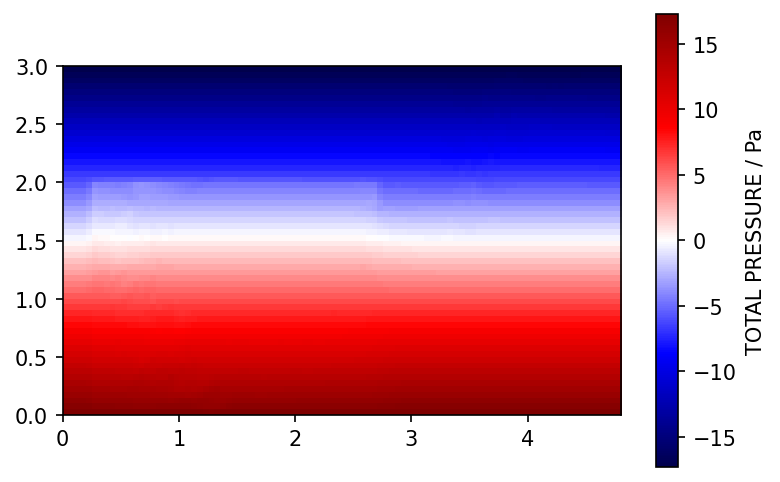

In [10]:
plt.imshow(p_data[it].T,
           origin='lower', 
           extent=extent,
           cmap='seismic')
q = "TOTAL PRESSURE"
u = "Pa"
plt.colorbar(label=f"{q} / {u}")
plt.show()

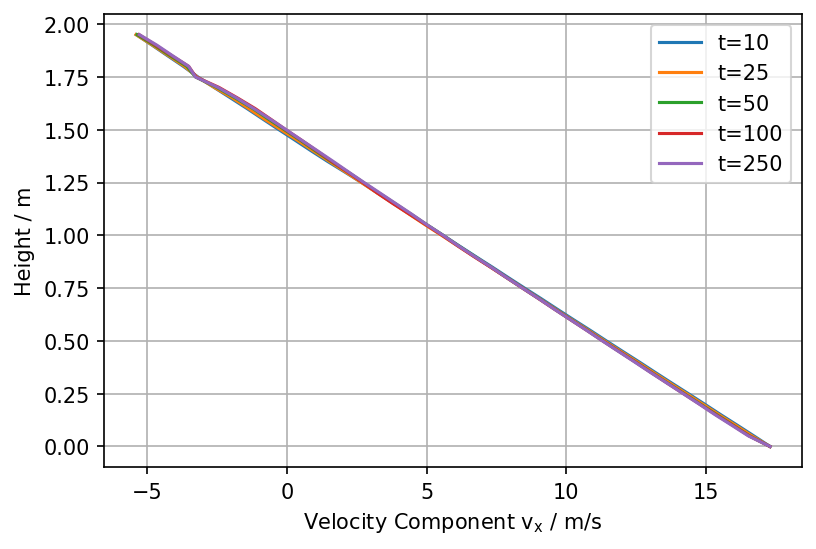

In [11]:
z_max = 2.0
iz_max = u_slice.get_nearest_index('y', z_max) 

### TODO: quick solution, needs fix
h = np.arange(0, z_max, 0.05)

list_t = [10, 25, 50, 100, 250]

for t in list_t:
    it = sim.slices[0].get_nearest_timestep(t)
    plt.plot(p_data[it, ix, 0:iz_max+5], h, label=f't={t}')

plt.xlabel('Velocity Component $\sf v_x$ / m/s')
plt.ylabel('Height / m')
plt.grid()
plt.legend()

## Flow 

```{margin}
See [introduction to the fdsreader module section](../../tools/03_analysis/02_fdsreader) for a quick introduction on how to read in FDS data in Python.
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fdsreader

plt.rcParams['figure.dpi'] = 150

In [2]:
path_to_data = '../../../../data/compartment/pressure_01/rundir/'

sim = fdsreader.Simulation(path_to_data)

Slice([3D] cell_centered=True, extent=Extent([0.00, 4.80] x [0.00, 0.05] x [0.00, 3.00]))


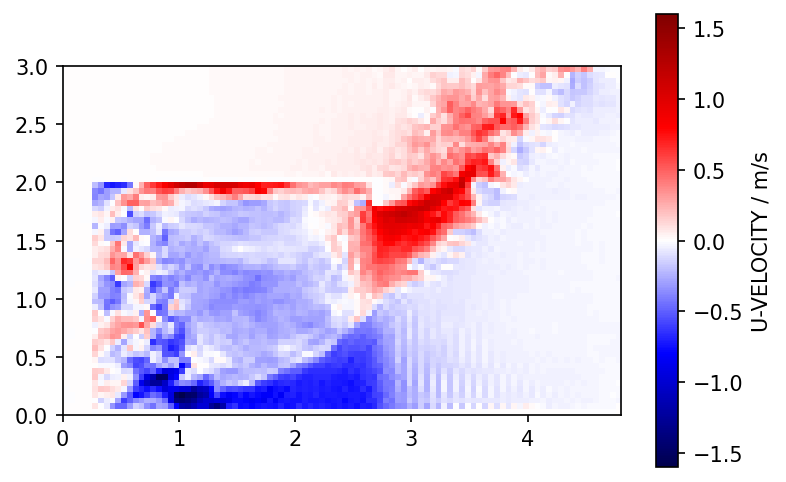

Slice([3D] cell_centered=True, extent=Extent([0.00, 4.80] x [0.00, 0.05] x [0.00, 3.00]))


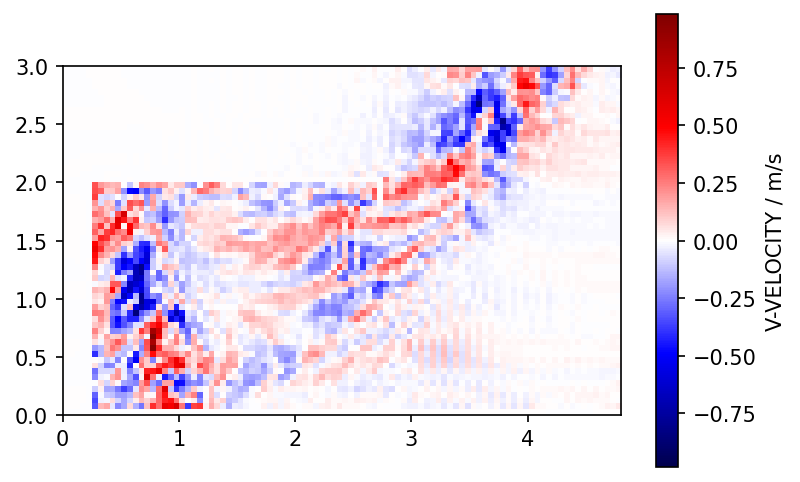

Slice([3D] cell_centered=True, extent=Extent([0.00, 4.80] x [0.00, 0.05] x [0.00, 3.00]))


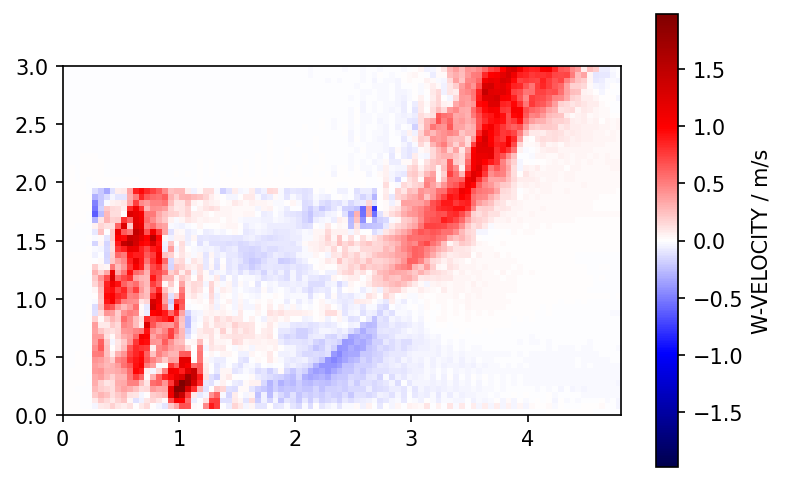

In [3]:
list_q = ['U-VELOCITY', 'V-VELOCITY', 'W-VELOCITY']
it = sim.slices[0].get_nearest_timestep(250)
for q in list_q:
    slice = sim.slices.filter_by_quantity(q)[0]
    
    print(slice)
    ### fds / fdsreader BUG workaround BEGIN
    ### Issue due to SLCF located at MESH boundary
    to_del = []
    for s in slice:
        if s.extent._extents[1][0] > 0:
            to_del.append(s.mesh)
    for m in to_del:
        del slice._subslices[m]
        
    extent = (slice.extent[0][0], slice.extent[0][1], 
              slice.extent[2][0], slice.extent[2][1])
#     print(extent)
    ### fds / fdsreader BUG workaround END
    
    slice_data = slice.to_global()
    
    v_abs_max = np.max(np.abs(slice_data[it]))
    
    plt.imshow(slice_data[it].T,
               vmin = -v_abs_max, vmax = v_abs_max,
               origin='lower', 
               extent=extent,
               cmap='seismic')
    q = slice.quantity.quantity
    u = slice.quantity.unit
    plt.colorbar(label=f"{q} / {u}")
    plt.show()

In [4]:
u_slice = sim.slices.filter_by_quantity('U-VELOCITY')[0]
slice_data = u_slice.to_global()

In [5]:
x0 = 2.7
ix = u_slice.get_nearest_index('x', x0)
print(f'Index in x-direction next to x={x0} is {ix}.')

z0 = 1.5
iy = u_slice.get_nearest_index('y', z0)
print(f'Index in z-direction next to z={z0} is {iy}.')

Index in x-direction next to x=2.7 is 54.
Index in z-direction next to z=1.5 is 35.


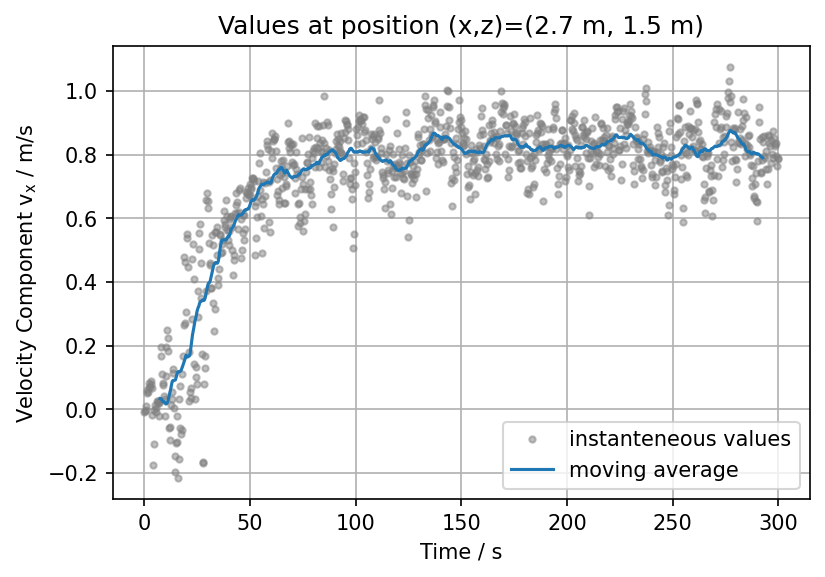

In [6]:
instant_values = slice_data[:, ix, iy]
n_a = 51
average_values = np.convolve(instant_values, np.ones(n_a)/n_a, mode='valid')
plt.plot(u_slice.times, instant_values, '.', color='grey', alpha=0.5, label='instanteneous values')
plt.plot(u_slice.times[n_a//2:-(n_a//2)], average_values, label='moving average')
plt.xlabel('Time / s')
plt.ylabel('Velocity Component $\sf v_x$ / m/s')
plt.grid()
plt.legend()
plt.title(f'Values at position (x,z)=({x0} m, {z0} m)');

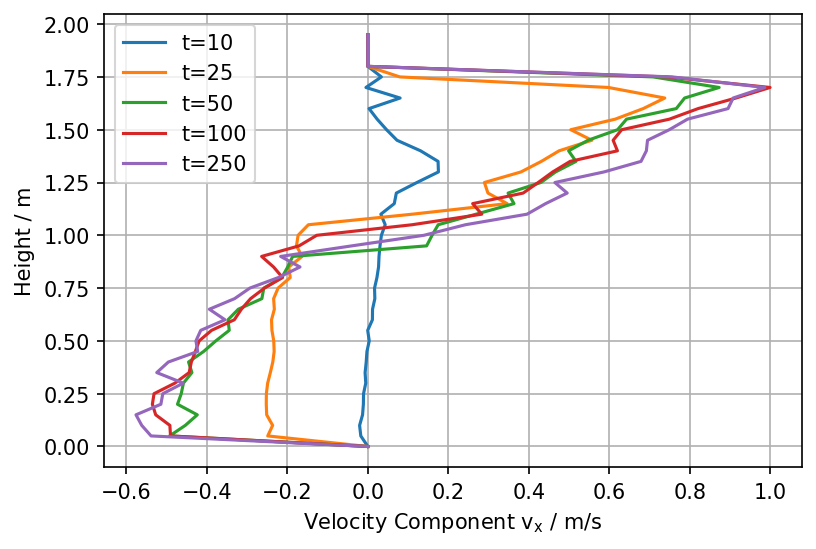

In [7]:
z_max = 2.0
iz_max = u_slice.get_nearest_index('y', z_max) 

### TODO: quick solution, needs fix
h = np.arange(0, z_max, 0.05)

list_t = [10, 25, 50, 100, 250]

for t in list_t:
    it = sim.slices[0].get_nearest_timestep(t)
    plt.plot(slice_data[it, ix, 0:iz_max+5], h, label=f't={t}')

plt.xlabel('Velocity Component $\sf v_x$ / m/s')
plt.ylabel('Height / m')
plt.grid()
plt.legend()

## Other Quantities

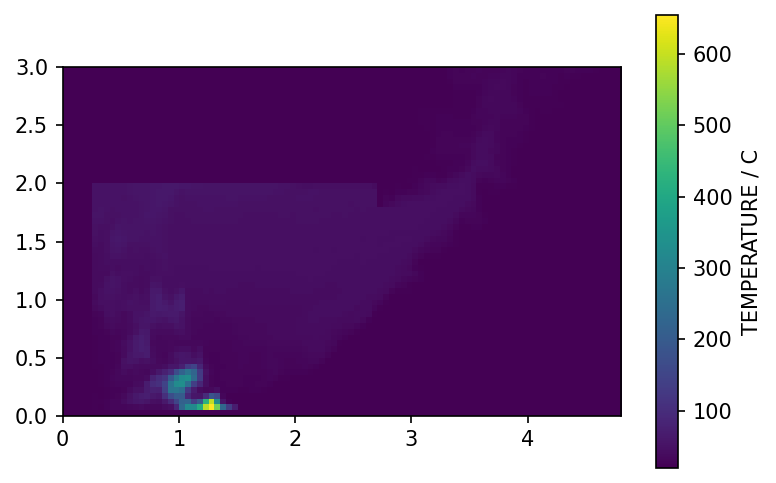

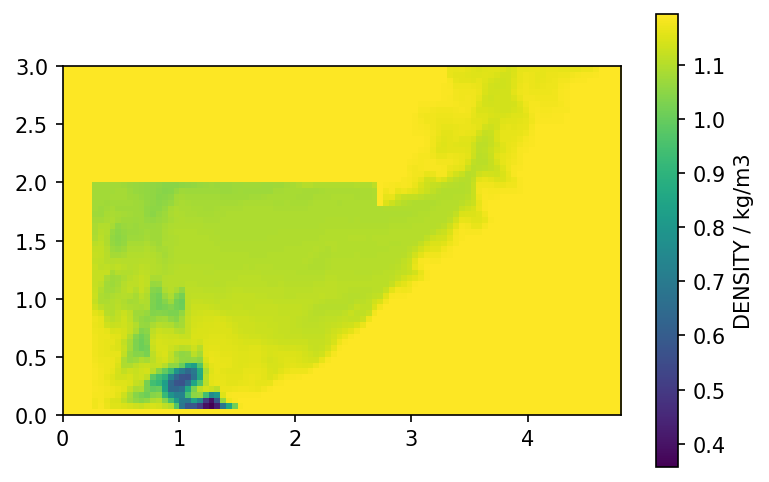

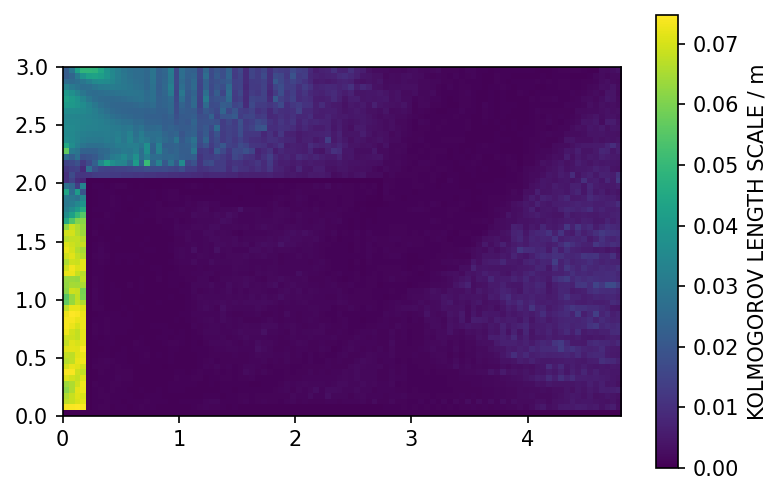

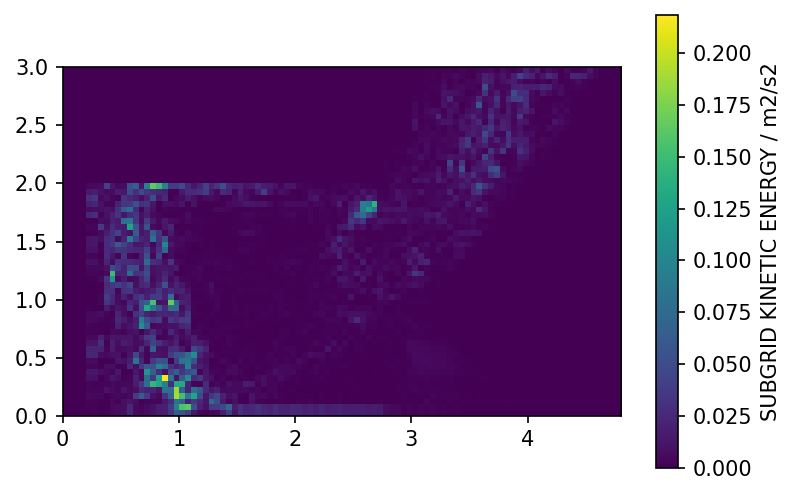

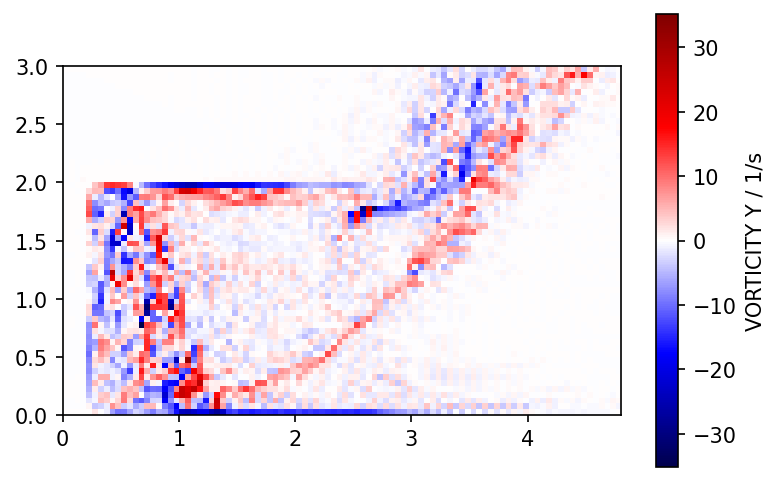

In [12]:
list_q = ['TEMPERATURE', 'DENSITY', 'KOLMOGOROV LENGTH SCALE', 'SUBGRID KINETIC ENERGY', 'VORTICITY Y']
it = sim.slices[0].get_nearest_timestep(250)
for q in list_q:
    slice = sim.slices.filter_by_quantity(q)[0]
    
#     print(slice)
    ### fds / fdsreader BUG workaround BEGIN
    ### Issue due to SLCF located at MESH boundary
    to_del = []
    for s in slice:
        if s.extent._extents[1][0] > 0:
            to_del.append(s.mesh)
    for m in to_del:
        del slice._subslices[m]
        
    extent = (slice.extent[0][0], slice.extent[0][1], 
              slice.extent[2][0], slice.extent[2][1])
#     print(extent)
    ### fds / fdsreader BUG workaround END
    
    slice_data = slice.to_global()
    
    if np.min(slice_data[it]) < 0:
        v_abs_max = np.max(np.abs(slice_data[it]))
        vmin = -v_abs_max
        vmax = v_abs_max
        cmap='seismic'
    else:
        vmin = np.min(slice_data[it])
        vmax = np.max(slice_data[it])
        cmap='viridis'
    
    plt.imshow(slice_data[it].T,
               vmin = vmin, vmax = vmax,
               origin='lower', 
               extent=extent,
               cmap=cmap)
    q = slice.quantity.quantity
    u = slice.quantity.unit
    plt.colorbar(label=f"{q} / {u}")
    plt.show()